# 1. Splitting the dataset

In [29]:
from sklearn.datasets import load_iris
iris = load_iris()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris['data'], iris['target'], random_state=0)

In [30]:
X_train.shape

(112, 4)

In [31]:
X_test.shape

(38, 4)

In [32]:
print(X_train.shape)
print(X_test.shape)

(112, 4)
(38, 4)


In [33]:
print(X_train.shape, X_test.shape)

(112, 4) (38, 4)


# 2. Building your first model

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [38]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

# 3. Making Prediction

In [39]:
import numpy as np

In [40]:
X_new = np.array([[5, 2.9, 1, 0.2]])
X_new.shape

(1, 4)

In [41]:
prediction = knn.predict(X_new)
print(prediction)

[0]


In [42]:
print(iris['target_names'][prediction])

['setosa']


# 4. Evaluating the model

In [43]:
y_pred = knn.predict(X_test)
np.mean(y_pred == y_test)

0.9736842105263158

In [44]:
knn.score(X_test,y_test)

0.9736842105263158

# Full Procedure

In [45]:
X_train, X_test, y_train, y_test = train_test_split(iris['data'], iris['target'], random_state=0)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.9736842105263158

# 5. Loading data from file

In [46]:
X = np.genfromtxt("iris_data.txt")
X[:3,]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

# 6. Exercises

Question 1.

In [47]:
y_pred == y_test

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False])

In [48]:
np.mean(y_pred == y_test)

0.9736842105263158

True is interpreted as 1 & False is interpreted as 0 so we take a total of all 1 & 0 and divide it by the total sample size to get the number of true prediction. Here we can see that 97% is our accuracy

Question 2.

In [54]:
results = np.empty(50)
for i in range(1,51):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  results[i-1] = knn.score(X_test, y_test)

Text(0, 0.5, 'Error rate')

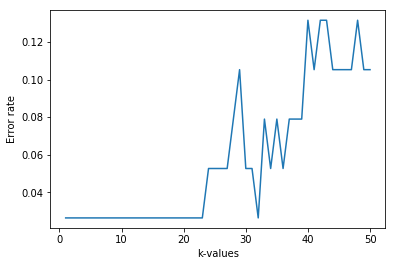

In [61]:
import matplotlib.pyplot as plt
plt.plot(np.arange(50)+1,1-results)
plt.xlabel('k-values')
plt.ylabel('Error rate')

Question 3.

In [57]:
load_iris_data = np.genfromtxt("iris_data.txt")
load_iris_target = np.genfromtxt("iris_target.txt")

In [58]:
np.mean(load_iris_data == iris['data'])

0.995

In [59]:
np.mean(load_iris_target == iris['target'])

1.0

So target set seems to be identical but the data set seems to be a bit different.

In [62]:
iris['data'].shape

(150, 4)

In [63]:
load_iris_data.shape

(150, 4)

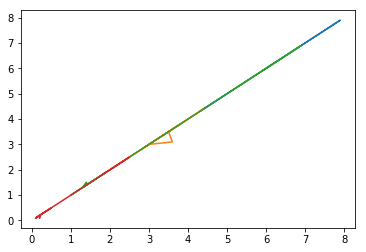

In [65]:
plt.plot(iris['data'],load_iris_data)